In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, segmentation, color
from openslide import OpenSlide
from PIL import Image
from skimage.io import imsave

In [2]:
# data_path = Path("/home/val/test_histoqc/")
# data_path = Path("/mnt/nas6/data/CPTAC")
# image_path = list(data_path.rglob("*.svs"))[2]
image_path = Path("/mnt/nas6/data/CPTAC/CPTAC-LSCC_v10/LSCC/C3L-00081-21.svs")

In [3]:
wsi_image = OpenSlide(image_path)
rescaling_factor = 100
test_image = wsi_image.get_thumbnail(
    (wsi_image.dimensions[0] // rescaling_factor,
     wsi_image.dimensions[1] // rescaling_factor))
test_image = np.array(test_image.convert("RGB"))

In [4]:
px_dim = 0.25
S_target = (3*224)**2
S_image = wsi_image.dimensions[0] * wsi_image.dimensions[1] * px_dim**2
num_segments = S_image / S_target

In [5]:
num_segments = int(np.round(num_segments))

In [6]:
pixel_size = 0.25 * rescaling_factor
target_tile_size = 3*224
min_size = target_tile_size / pixel_size

In [7]:
min_size

26.88

In [8]:
print(f"Shape of test_image: {test_image.shape}")

Shape of test_image: (246, 258, 3)


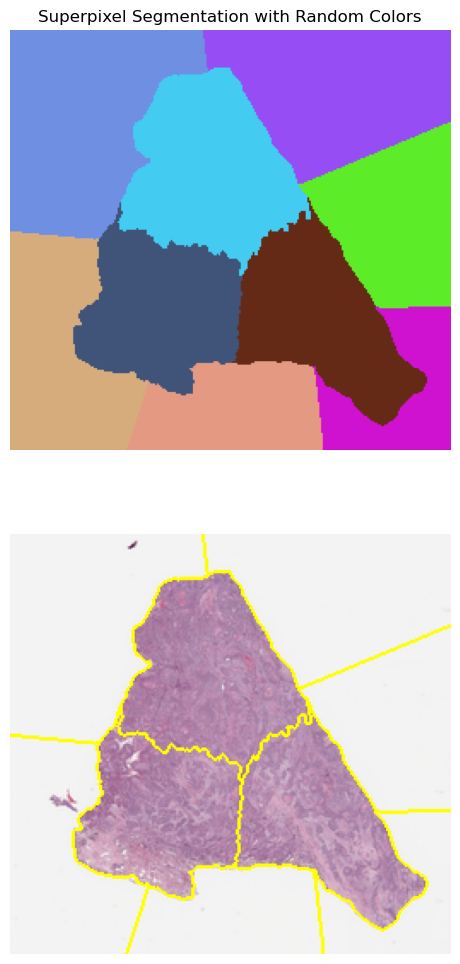

In [10]:
# num_segments = 400  # Adjust for granularity
segments = segmentation.slic(test_image, n_segments=8, compactness=20, sigma=1, start_label=1)
# segments = segmentation.felzenszwalb(test_image, scale=100, sigma=1, min_size=int(min_size**2))

# Generate random colors for each superpixel
unique_segments = np.unique(segments)
num_labels = len(unique_segments)

# Create a color map (random RGB colors for each label)
random_colors = np.random.randint(0, 255, size=(num_labels, 3), dtype=np.uint8)

# Create a colored segmentation image
colored_segments = np.zeros_like(test_image)  # Placeholder for colored mask
for i, label in enumerate(unique_segments):
    mask = segments == label  # Find pixels belonging to the current superpixel
    colored_segments[mask] = random_colors[i]  # Assign random color


superpixel_boundaries = segmentation.mark_boundaries(test_image, segments)
superpixel_boundaries = (superpixel_boundaries * 255).astype(np.uint8)  # Convert to 8-bit format

# Display the result
plt.figure(figsize=(12, 12))
plt.subplot(211)
plt.imshow(colored_segments)
plt.axis("off")
plt.title("Superpixel Segmentation with Random Colors")
plt.subplot(212)
plt.imshow(superpixel_boundaries)
plt.axis("off")
plt.show()


In [34]:
test_image.shape

(255, 357, 3)

In [33]:
segments.shape

(255, 357)

In [45]:
# Save Images
imsave("test_image.png", test_image)
imsave("test_boundaries.png", superpixel_boundaries)